## Meta Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain (Categories): 
    1. typical angina 
    2. atypical angina 
    3. non-anginal 
    4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values` (Categories): 
    1. normal 
    2. stt abnormality 
    3. lv hypertrophy
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`(Categories): 
    1. normal
    2. fixed defect
    3. reversible defect
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

### Import Libraries:
Let's Start the project by importing all the libraries that we will need in this project

In [1]:
# Import the Libraries
# 1. To handle data 
import pandas as pd
import numpy as np
# 2. To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 3. To preprocess data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# 4. To impute data
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, mean_squared_error, mean_absolute_error
#pipeline
from sklearn.pipeline import Pipeline
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')



### Load the Dataset

In [2]:
# Load the dataset from CSV file

df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# get the data of first 5 rows of this dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis(EDA)

### Explore each Column

In [3]:
# Explore the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check the shape of Data
df.shape

(920, 16)

In [5]:
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# Check minimum and maximum age
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

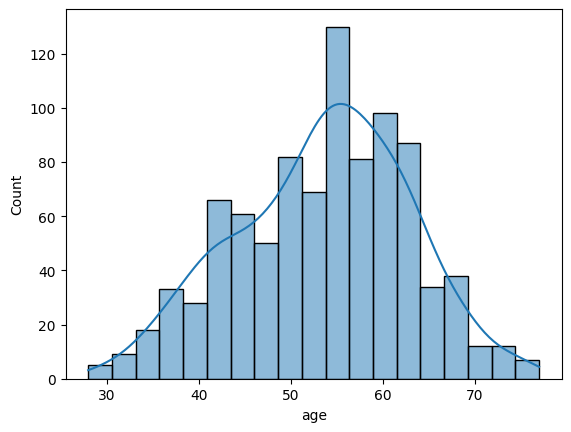

In [7]:
# Plot histogram to see the distribution of with respect to age column
sns.histplot(df['age'], kde=True) 

Mean: 53.51086956521739
Median: 54.0
Mode: 54


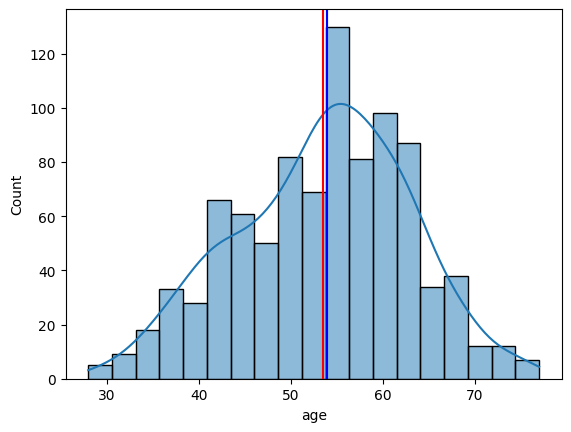

In [8]:
# Plot histogram of age column to find the mean, median, mode by using sns
# `axvline` is a Matplotlib function that adds a vertical line to the plot at a specified x-axis position.

sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
#  Since mode returns a Series, [0] is used to get the first mode (assuming there is only one mode).
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's explore the gender based distribution of the dataset for age column

In [9]:
# plot the histogram of age column using plotly and coloring this by sex
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [10]:
# find the value of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Heart Disease Male percentage in the data: {male_percentage:.2f}%")
print(f"Heart Disease Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Heart Disease Male percentage in the data: 78.91%
Heart Disease Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [12]:
# find the value count of 'age' column grouped by 'sex' column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [13]:
# Let's deal with 'dataset' column
# find the unique values in 'dataset' column

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# find unique value count in 'dataset' column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

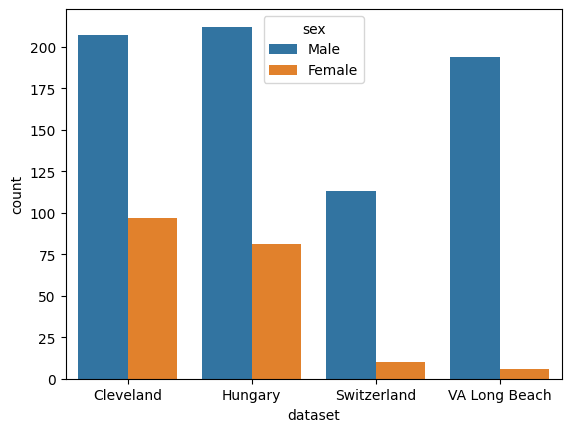

In [15]:
# plot the countplot of 'dataset' column
# get information about the count of heart disease patient 
sns.countplot(data=df, x='dataset', hue="sex")

In [16]:
# We can also plot this with the help of plotly, as the plots of plotly is beautiful for visualizing
fig = px.bar(df, x="dataset", color="sex")
fig.show()

In [17]:
# Value count of 'dataset' column 
df.groupby("sex")['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [18]:
# Plot the 'age' column using plotly and color this by 'dataset' column
fig = px.histogram(data_frame=df, x='age', color="dataset")
fig.show()

In [19]:
# print the value of mean, median and mode of age column
print('Mean of "Dataset" Column:', df.groupby("dataset")['age'].mean())
print("-----------------------------------------")
print('Median of "Dataset" Column:', df.groupby("dataset")['age'].median())
print("-----------------------------------------")
print('Mode of "Dataset" Column:', df.groupby("dataset")['age'].agg(pd.Series.mode))

Mean of "Dataset" Column: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------------------
Median of "Dataset" Column: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------------------
Mode of "Dataset" Column: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Now Explore 'cp' (Chest Pain) Column

In [20]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [21]:
# Plot the 'cp' column using plotly and color this by 'cp' column
fig = px.histogram(data_frame=df, x='age', color="cp")
fig.show()

<Axes: xlabel='cp', ylabel='count'>

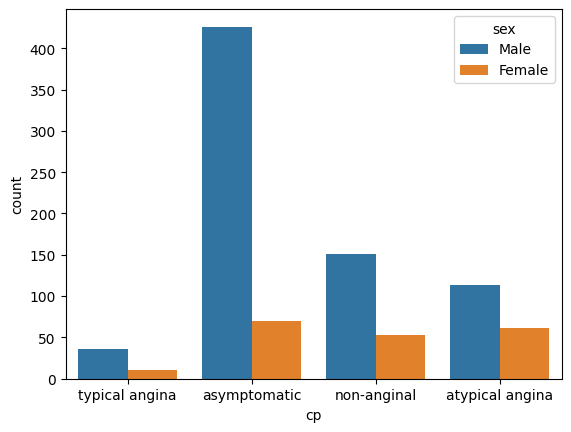

In [22]:
# Count plot with the help of "seaborn"
sns.countplot(df, x="cp", hue="sex")

<Axes: xlabel='cp', ylabel='count'>

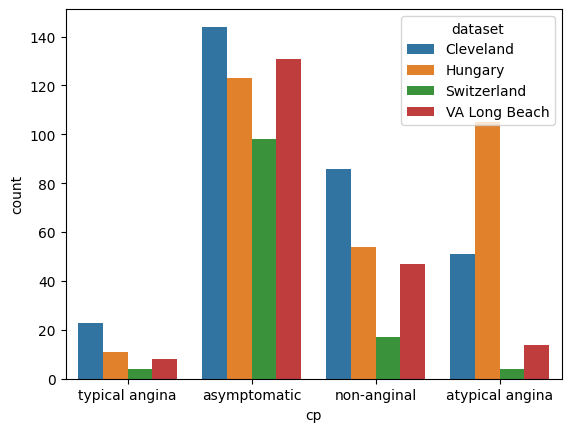

In [23]:
# Count plot with the help of "seaborn"
sns.countplot(df, x="cp", hue="dataset")

In [24]:
# Value count to check that which place has the most 'cp'
df.groupby("dataset")['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

#### Let's explore the trestbps (rating blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg

In [25]:
# first let's describe the 'trestbps' column

df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

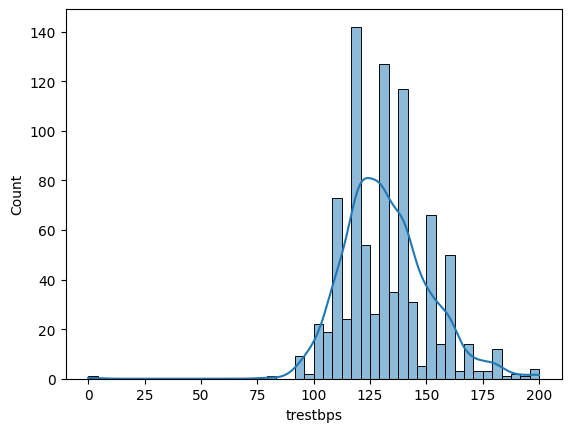

In [26]:
#create a histplot of 'trestbps' column
sns.histplot(df['trestbps'], kde=True)

In [27]:
# plot the 'trestbps' column using plotly
fig = px.histogram(data_frame=df, x="trestbps", color="dataset")
fig.show()

In [28]:
# First, let's deal with missing values in the 'trestbps' column
# find the percentage of missing values in 'trestbps' column
# df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)

# Next, let's find the percentage of missing values in the 'trestbps' column
missing_percentage = (df['trestbps'].isnull().sum() / len(df['trestbps'])) * 100
print(f"The Percentage of missing values in the 'trestbps' column is: {missing_percentage} %")

The Percentage of missing values in the 'trestbps' column is: 6.41304347826087 %


Impute the missing values of 'trestbps' column

In [29]:
# impute the missing values in the 'trestbps' column with the iterative imputer
# create object of the IterativeImputer
imputer= IterativeImputer(max_iter=10, random_state=42)

# fit and transform the entire DataFrame
df[['trestbps']] = imputer.fit_transform(df[['trestbps']])

# check and print the missing values in the 'trestbps' column with proper message
print(f"Now missing values in the 'trestbps' column is: {df['trestbps'].isnull().sum() / len(df['trestbps']) * 100} %")


Now missing values in the 'trestbps' column is: 0.0 %


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Let's explore the 'thal' column

In [31]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [32]:
df.groupby('dataset')['thal'].value_counts()

dataset        thal             
Cleveland      normal               166
               reversable defect    117
               fixed defect          18
Hungary        reversable defect     11
               fixed defect          10
               normal                 7
Switzerland    reversable defect     42
               normal                19
               fixed defect          10
VA Long Beach  reversable defect     22
               fixed defect           8
               normal                 4
Name: count, dtype: int64

In [33]:
df.groupby('sex')['thal'].value_counts()

sex     thal             
Female  normal                86
        reversable defect     21
        fixed defect           4
Male    reversable defect    171
        normal               110
        fixed defect          42
Name: count, dtype: int64

Check how much column we still need to impute (means how much missing values we still have in our dataframe)

In [34]:
# Let's impute all other missing values of other columns
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False) 

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

Let's Impute the missing values of **'float64'** datatype column

In [35]:
# Impute the missing values using IterativeImputer for ca, thalch, oldpeak, chol
# create a new imputer object

imputer_2 = IterativeImputer()

# Define the columns to impute
columns_to_impute = ['ca', 'thalch', 'oldpeak', 'chol']

# Impute the missing values in the specified columns
df[columns_to_impute] = imputer_2.fit_transform(df[columns_to_impute])

In [36]:
# again check the missing value percentage
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)
# after executing the above code we can see that there are no missing values in the imputed columns of 'float' type

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

### <kbd style="color: black; width: 150px; font-weight: bold;">Let's impute the missing values in 'object' type columns by using ML Models</kbd>

In [37]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).index.tolist()
missing_data_cols

['thal', 'slope', 'fbs', 'exang', 'restecg']

In [38]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [39]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [40]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [41]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy



In [42]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### <kbd style="color: black; width: 150px; font-weight: bold;">Let's Deal with Outliars</kbd>

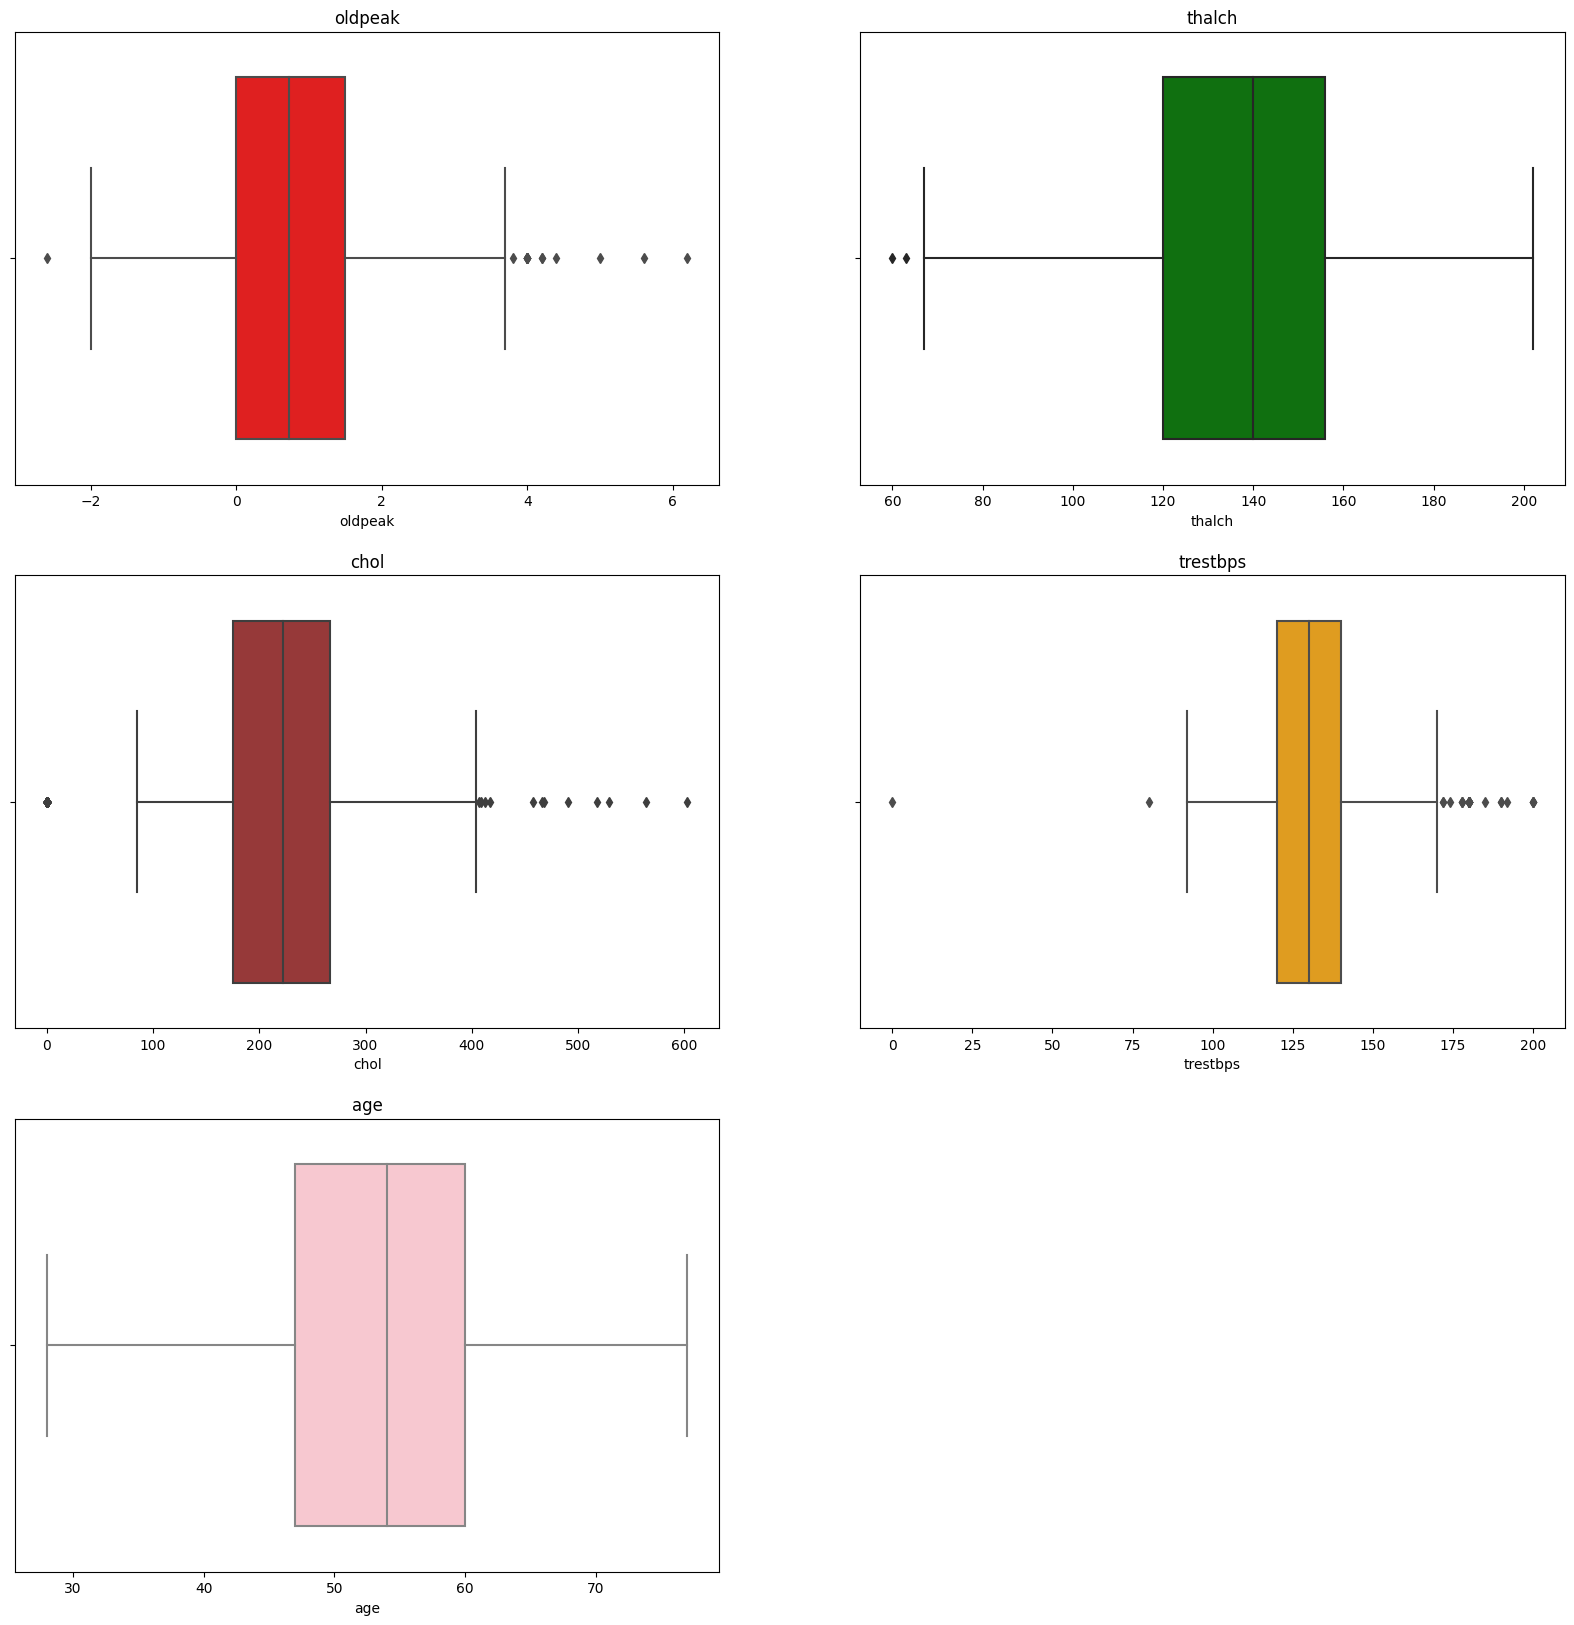

In [43]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'brown', 'orange', 'pink']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [44]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [45]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]


In [46]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 200]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
126,127,56,Female,Cleveland,asymptomatic,200.0,288.0,True,lv hypertrophy,133.0,True,4.0,downsloping,2.000000,reversable defect,3
548,549,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,flat,0.813802,reversable defect,1
680,681,61,Male,Switzerland,non-anginal,200.0,0.0,False,st-t abnormality,70.0,False,0.0,flat,1.000953,normal,3
701,702,64,Female,Switzerland,asymptomatic,200.0,0.0,False,normal,140.0,True,1.0,flat,0.508259,normal,3


### <kbd style="color: black; width: 150px; font-weight: bold;">Machine Learning for Predictions</kbd>

In [47]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [48]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is **num** which is the predicted attribute. We will use this **num** column to predict the heart disease.\
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease
- 3 = severe heart disease
- 4 = critical heart disease


In [49]:
# Split the data into train(X) and test(y)
X= df.drop('num', axis=1)
y= df['num']

# encode X data using seperate label encoder for all categorical columns and save it for inverse transform

# Create a separate label encoder for each categorical column in X
label_encoder =LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        
        X[col] = label_encoder.fit_transform(X[col])

# Save the label encoders for inverse transform
label_encoder

# separate X data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

All the models that we will use for the prediction of heart disease.

- Logistic Regression
- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- XGBoost
- GradientBoosting
- AdaBoost


In [50]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ("LogisticRegression", LogisticRegression(random_state=42)),
    
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')),
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6407461240310077
Test Accuracy: 0.6376811594202898

Model: Gradient Boosting
Cross-validation Accuracy: 0.6329457364341085
Test Accuracy: 0.6557971014492754

Model: Support Vector Machine
Cross-validation Accuracy: 0.5988129844961241
Test Accuracy: 0.5688405797101449

Model: Logistic Regression
Cross-validation Accuracy: 0.6128754844961241
Test Accuracy: 0.5615942028985508

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5863493217054263
Test Accuracy: 0.5905797101449275

Model: Decision Tree
Cross-validation Accuracy: 0.5894500968992248
Test Accuracy: 0.5942028985507246

Model: Ada Boost
Cross-validation Accuracy: 0.5660368217054264
Test Accuracy: 0.5869565217391305

Model: XG Boost
Cross-validation Accuracy: 0.606468023255814
Test Accuracy: 0.6557971014492754

Model: Naive Bayes
Cross-validation Accuracy: 0.5645833333333334
Test Accuracy: 0.5507246376811594

Model: LogisticRegression
Cross-validation Accuracy: 0.61287548449612

#### Outputs:
1. The minimum age of heart disease starts from 28 years old.
2. Most of the males and females get heart disease at the age of 54-55 years
3. Heart Disease Male percentage in the data: **78.91%**
4. Heart Disease Female Percentage in the data: **21.09%**
5. Males are **274.23%** more than females in the data.
6. The highest number of patient we get from **Cleveland** and the lowest is from **Switzerland**
    - The highest number of females are from **Cleveland** and lowest from **VA Long Beach**
    - The highest number of males are from **Hungary** and lowest from **Switzerland**
7. The Highest mean, median, mode we get from 'Age' column when we grouped it with 'dataset' column is:
    - Highest mean is from "Cleveland"(54.351) and lowest is from "VA Long Beach"(59.3500)
    - Highest median is from "Cleveland"(55.5) and lowest is from "VA Long Beach"(60)
    - Highest mode is from "Cleveland"(58) and lowest is from "VA Long Beach"(62,63)
8. The Highest Chest pain from 'cp' column is:
    - Most of the people have **asymptomatic angina** problem
    - Most of the people who have **asymptomatic angina** is from **Cleveland**
9. From **trestbps** column, I explore that:
    1. Most of the females has **trestbps** is **normal** (143)
    2. Most of the males has **trestbps** is **reversable defect** (478)
    3. Most of the **reverseable defect** we found from **Hungary**(149), **Switzerland**(86), **VA Long Beach**(171)
10. Impute Missing Values:
    1. We make two **function** for imputing missing values:
        1. **impute_categorical_missing_data** function for imputing Categorical/Object type data
        2. **impute_continuous_missing_data** function for imputing Continuous/Numerical data
11. Dealing with Outliars:
    1. We find that no one has the **trestbps** is equals to **0**.So, we remove that row from our dataset
    2. When we check about **chol**, we find that **171** people has chol equals to **0**, So we can not conclude this as Outliar.
    3. All other points who seems as outliar are not actually outliar, because they are dependent on each other(e.g :- A person should have a **trestbps** of 200.0)
12. Model Evaluation:
    - We Evaluate 9 Models and the Best Model we find is **GradientBoostingClassifier**
    - Although the Accuracy is not good but It is better than other Tested Models
    - We can improve the Accuracy by Using other Machine Learning Models and by doing some Feature Engineering, Feature Selection and Hyperparameter Tuning